In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
filename  = input('Please key in the filename: ')
df=pd.read_csv(filename)
df

In [2]:
path = 'data/sales2019_1.csv'
dataframe = pd.read_csv(path)
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [2]:
path='data/'
dataframe = pd.read_csv(path + 'sales2019_1.csv' )
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Clean and Preprocess data

#### Merge 12-month data


In [4]:
frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'): #chỉ láy ra file có đuôi .csv
        filepath = path + file
        df1= pd.read_csv(filepath) 
        frames.append(df1)
        result = pd.concat(frames)# gọp nhiều data frame
        length_1month = len(df1.index) # check độ dài bao nhiêu dòng của datarame
        all_length.append(length_1month)
df = result
# df.to_csv('annualSales2019.csv', index =False) # đưa dataframe vào file

In [5]:
print(sum(all_length))

186850


In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Task: Add 'Month' column

In [6]:
df['Month'] = '' # thêm column rỗng
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",


In [7]:
df['Order Date'] # truy cập vào giá trị của cột order date

0        01/22/19 21:25
1        01/28/19 14:15
2        01/17/19 13:33
3        01/05/19 20:33
4        01/25/19 11:59
              ...      
11681    09/17/19 20:56
11682    09/01/19 16:00
11683    09/23/19 07:39
11684    09/19/19 17:30
11685    09/30/19 00:18
Name: Order Date, Length: 186850, dtype: object

In [8]:
df['Order Date'].str[0:2] # cắt slice tring trong pandas series

0        01
1        01
2        01
3        01
4        01
         ..
11681    09
11682    09
11683    09
11684    09
11685    09
Name: Order Date, Length: 186850, dtype: object

In [9]:
df['Month'] = df['Order Date'].str[0:2] # gán giá trị cắt được vào column month

In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [15]:
print(set(df['Month'])) # láy ra các unique value(các giá trị duy nhất)

{'04', '07', '01', '10', '06', '11', '02', '08', '03', '09', '05', '12'}


In [19]:
df['Month'].unique() # láy ra các unique value (các giá trị duy nhất)

array(['01', nan, 'Or', '02', '10', '11', '12', '03', '04', '05', '06',
       '07', '08', '09'], dtype=object)

### Task: Get rid of 'nan' and 'or' value

In [11]:
df.isna().any() # có các giá trị nan

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
Month               True
dtype: bool

In [12]:
# drop các colum có gái trị nan
df.dropna(how='any', inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [14]:
# loại các df chưa gái trị 'or' cảu column Month
df = df[df['Month']!='Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


### Reporting

#### Task: what was the best month for sales?  how much was earned that month ?

In [18]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [17]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'], downcast ='integer')
df['Price Each']=pd.to_numeric(df['Price Each'], downcast = 'float')

<ipython-input-17-4c9f9cc4efd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'], downcast ='integer')
<ipython-input-17-4c9f9cc4efd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each']=pd.to_numeric(df['Price Each'], downcast = 'float')


In [19]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

<ipython-input-19-611e09bde047>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [21]:
## di chuyển cột sale sang gần cột Price each
moving_colum = df.pop('Sales')
df.insert(4,'sale', moving_colum)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,sale,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [22]:
# tỏng giá trị bán được theo tháng
df.groupby('Month').sum()['sale']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: sale, dtype: float32

In [23]:
sale_value = df.groupby('Month').sum()['sale']
sale_value.max()

4613443.5

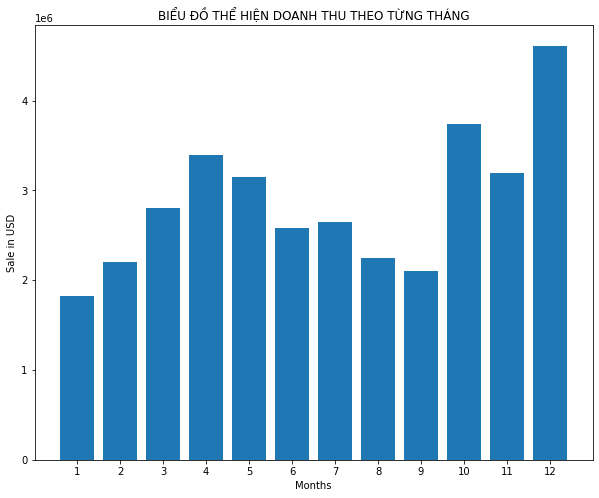

In [24]:
months = range(1,13)
plt.figure(figsize=(10,8))
plt.bar(x=months, height = sale_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sale in USD')
plt.title('BIỂU ĐỒ THỂ HIỆN DOANH THU THEO TỪNG THÁNG')
plt.show()

### what city has the best sale?

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,sale,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [27]:
sample_address = '944 Walnut St, Boston, MA 02215'
sample_address.split(',')[1] # cắt để láy ra city

' Boston'

In [28]:
# viết hàm để thực hiện thao tác 
sample_address = '944 Walnut St, Boston, MA 02215'
def getcity(sample_address):
    return sample_address.split(',')[1] 


In [29]:
# viết hàm trên thành lambda
address_to_city = lambda address:address.split(',')[1]
df['city'] = df['Purchase Address'].apply(address_to_city)
df

<ipython-input-29-d57331fae833>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['Purchase Address'].apply(address_to_city)


,Order ID,Product,Quantity Ordered,Price Each,sale,Order Date,Purchase Address,Month,city
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,8.970000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles
11682,259354,iPhone,1,700.000000,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco
11683,259355,iPhone,1,700.000000,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.989990,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,San Francisco


In [30]:
df.groupby('city').sum()['sale']

city
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: sale, dtype: float32

In [31]:
sale_value_city = df.groupby('city').sum()['sale']
sale_value_city.max()

8262204.0

In [40]:
# lọc ra đúng theo thứ tự các giá trị
Cities = []
for city, sale in sale_value_city.items():
    Cities.append(city)
print(Cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


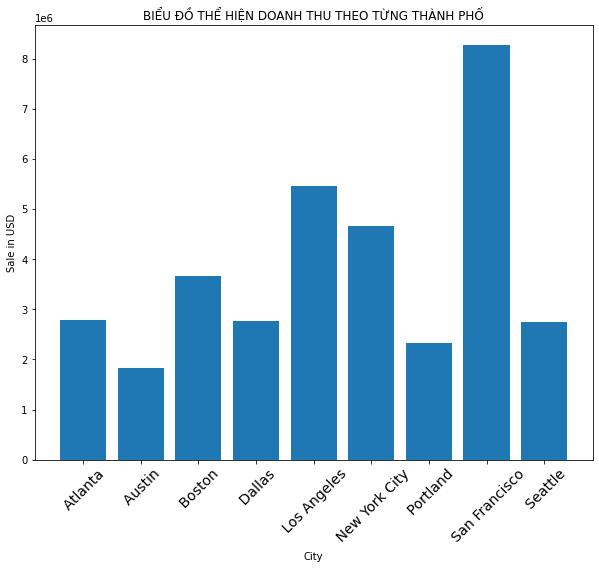

In [41]:
plt.figure(figsize=(10,8))
plt.bar(x=Cities, height = sale_value_city)
plt.xticks(Cities, rotation = 45, size =14)
plt.xlabel('City')
plt.ylabel('Sale in USD')
plt.title('BIỂU ĐỒ THỂ HIỆN DOANH THU THEO TỪNG THÀNH PHỐ')
plt.show()

### Doanh nghiệp cần chiếu quảng cáo vào khung thời gian nào để tăng khả năng mua hàng của customer
### what time should we display ads to maximize the likelihood of customer's buying product?

In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,sale,Order Date,Purchase Address,Month,city
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [43]:
## object là string
print(df['Order Date'].dtypes)

object


In [44]:
df['Order Date'] = pd.to_datetime(df['Order Date']) # chuyển đổi kiểu dữ liệu


<ipython-input-44-f5779b1b9e1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [45]:
print(df['Order Date'].dtypes)

datetime64[ns]


In [50]:
df['Hours']=df['Order Date'].dt.hour
df.head()

<ipython-input-50-c82c69432f55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hours']=df['Order Date'].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,sale,Order Date,Purchase Address,Month,city,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


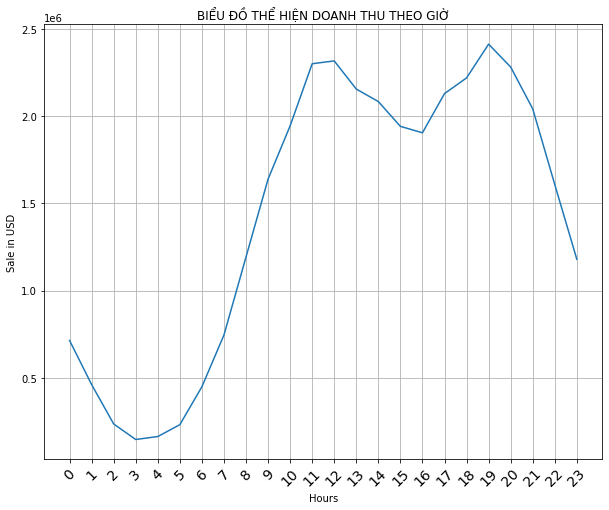

In [54]:
sale_value_hour = df.groupby('Hours').sum()['sale']

Hours = []
for hour, sale in sale_value_hour.items():
    Hours.append(hour)

plt.figure(figsize=(10,8))
plt.plot(Hours,  sale_value_hour)
plt.grid()
plt.xticks(Hours, rotation = 45, size =14)
plt.xlabel('Hours')
plt.ylabel('Sale in USD')
plt.title('BIỂU ĐỒ THỂ HIỆN DOANH THU THEO GIỜ')
plt.show()

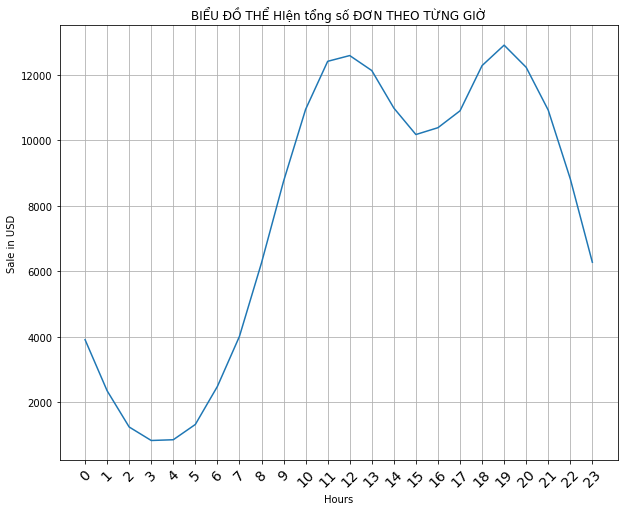

In [56]:
sale_value_hour = df.groupby('Hours').count()['sale']

Hours = []
for hour, sale in sale_value_hour.items():
    Hours.append(hour)

plt.figure(figsize=(10,8))
plt.plot(Hours,  sale_value_hour)
plt.grid()
plt.xticks(Hours, rotation = 45, size =14)
plt.xlabel('Hours')
plt.ylabel('Sale in USD')
plt.title('BIỂU ĐỒ THỂ HIện tổng số ĐƠN THEO TỪNG GIỜ')
plt.show()

### what product are most often sold together?

In [57]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,sale,Order Date,Purchase Address,Month,city,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [60]:
df_dup= df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,sale,Order Date,Purchase Address,Month,city,Hours
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [61]:
# gọp các pruct chung order id thành 1 row
groupProduct = lambda product: ','.join(product)

df_dup['All product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

<ipython-input-61-1bc2beda78a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,sale,Order Date,Purchase Address,Month,city,Hours,All product
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone,Wired Headphones"


In [62]:
df_dup[['Order ID', 'All product']].drop_duplicates()

,Order ID,All product
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [64]:
# láy ra 10 sản phẩm thường được bán cùng nhau, số lần bán của các sản phầm
df_dup['All product'].value_counts().head(10)

iPhone,Lightning Charging Cable                       1764
Google Phone,USB-C Charging Cable                     1712
iPhone,Wired Headphones                                722
Vareebadd Phone,USB-C Charging Cable                   624
Google Phone,Wired Headphones                          606
iPhone,Apple Airpods Headphones                        572
Google Phone,Bose SoundSport Headphones                322
Google Phone,USB-C Charging Cable,Wired Headphones     231
Vareebadd Phone,Wired Headphones                       208
iPhone,Lightning Charging Cable,Wired Headphones       168
Name: All product, dtype: int64

### what product sold the most ? why do you think it sold the most?

In [65]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,sale,Order Date,Purchase Address,Month,city,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [67]:
all_product = df.groupby('Product').sum()['Quantity Ordered']
all_product

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

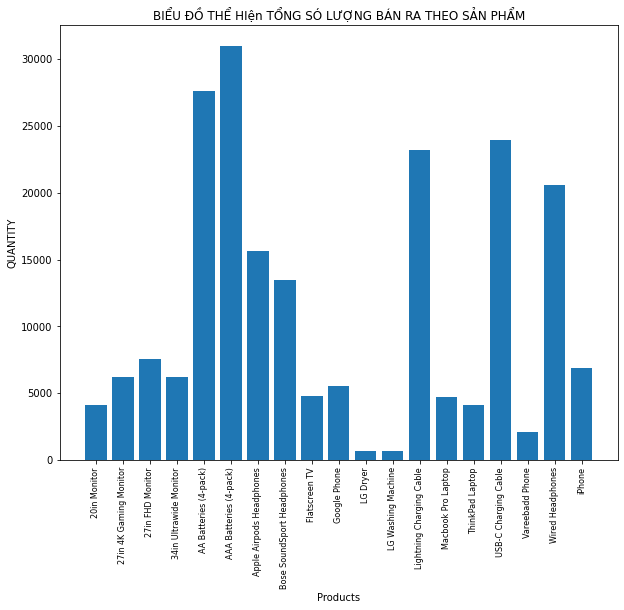

In [71]:

products_ls = []
for product, quan in all_product.items():
    products_ls.append(product)

plt.figure(figsize=(10,8))
plt.bar(x=products_ls, height = all_product )
plt.xticks(products_ls, rotation = 90, size =8)
plt.xlabel('Products')
plt.ylabel('QUANTITY')
plt.title('BIỂU ĐỒ THỂ HIện TỔNG SÓ LƯỢNG BÁN RA THEO SẢN PHẨM')
plt.show()

In [73]:
# giá trị trung bình của từng sản phẩm
prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

<ipython-input-75-a438c783080b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


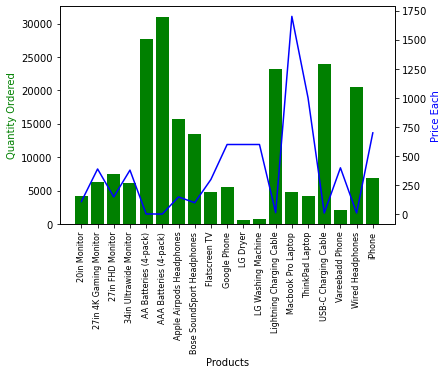

In [75]:
x = products_ls
y1 = all_product
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color ='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()
